In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gzip, cPickle

from collections import namedtuple

In [46]:
files = glob.glob('../results/a2-Apr2/e*') 

In [47]:
files, len(files)

(['../results/a2-Apr2/errors10.pkl.gz',
  '../results/a2-Apr2/errors8.pkl.gz',
  '../results/a2-Apr2/errors4.pkl.gz',
  '../results/a2-Apr2/errors2.pkl.gz',
  '../results/a2-Apr2/errors6.pkl.gz',
  '../results/a2-Apr2/errors0.pkl.gz',
  '../results/a2-Apr2/errors5.pkl.gz',
  '../results/a2-Apr2/errors9.pkl.gz',
  '../results/a2-Apr2/errors1.pkl.gz',
  '../results/a2-Apr2/errors11.pkl.gz',
  '../results/a2-Apr2/errors7.pkl.gz',
  '../results/a2-Apr2/errors3.pkl.gz',
  '../results/a2-Apr2/errors12.pkl.gz',
  '../results/a2-Apr2/errors14.pkl.gz',
  '../results/a2-Apr2/errors20.pkl.gz',
  '../results/a2-Apr2/errors16.pkl.gz',
  '../results/a2-Apr2/errors22.pkl.gz',
  '../results/a2-Apr2/errors18.pkl.gz',
  '../results/a2-Apr2/errors15.pkl.gz',
  '../results/a2-Apr2/errors17.pkl.gz',
  '../results/a2-Apr2/errors13.pkl.gz',
  '../results/a2-Apr2/errors23.pkl.gz',
  '../results/a2-Apr2/errors21.pkl.gz',
  '../results/a2-Apr2/errors19.pkl.gz',
  '../results/a2-Apr2/errors24.pkl.gz',
  '../resu

In [48]:
ex_list = []
for filename in files:
    ex = []
    ex.append(filename)
    with gzip.open(filename, "r") as f:
        with gzip.open(filename.replace('errors', 'params'), 'r') as f_param:
            errors = cPickle.load(f)
            params = cPickle.load(f_param)
            ex.extend(errors)
            ex.extend(params)
        
    ex_list.append(ex)

In [49]:
list(enumerate(ex_list[0]))

[(0, '../results/a2-Apr2/errors10.pkl.gz'),
 (1, array([ 0.00101335,  0.00092144,  0.00080075,  0.00077267,  0.00076114,
          0.00076534,  0.00081782,  0.00085173,  0.00080503,  0.0008283 ,
          0.00084919,  0.00094249])),
 (2, array([ 0.00176313,  0.00176288,  0.00204045,  0.00232295,  0.00244725,
          0.00240401,  0.00247883,  0.00243784,  0.00273008,  0.00239436,
          0.00219878,  0.00176192])),
 (3, 61.71646189689636),
 (4, 0.00093363802),
 (5, 0.0017619194),
 (6, nan),
 (7, nan),
 (8, 0.0014534949),
 (9, 0.0024600944),
 (10, 9670),
 (11, 0.0015429322508456352),
 (12, [0.89563130137335933, 0.932844595464559]),
 (13, 0.00022410318201659124),
 (14, 0.014330364833609622),
 (15, ['relu', 'relu'])]

In [50]:
for ex in ex_list:
    if np.isnan(ex[6]):
        ex[6] = 0.02
        ex[7] = 0.02
        ex[8] = 0.005
        ex[9] = 0.005

In [51]:
for i, ex in enumerate(ex_list):
    plt.plot(ex[1], label=str(i))

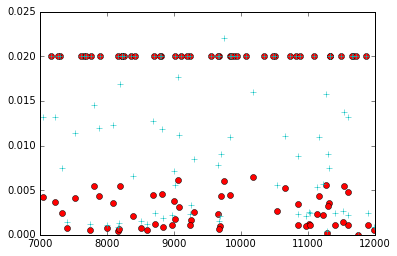

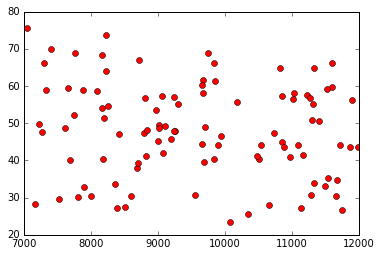

In [52]:
plt.plot([ex[10] for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([ex[10] for ex in ex_list], [ex[7] for ex in ex_list], 'c+')
plt.figure()
plt.plot([ex[10] for ex in ex_list], [ex[8] for ex in ex_list], 'ro')
plt.plot([ex[10] for ex in ex_list], [ex[9] for ex in ex_list], 'c+')
plt.figure()
plt.plot([ex[10] for ex in ex_list], [ex[3] for ex in ex_list], 'ro')

plt.figure()

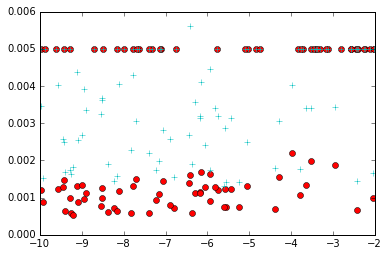

In [54]:
# l2 ほぼ効いてないけど高いほうがよさそう, 0だと学習不安定になる
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[6] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[7] for ex in ex_list], 'c+')
plt.figure()
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[8] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[9] for ex in ex_list], 'c+')

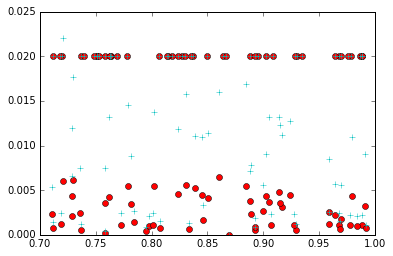

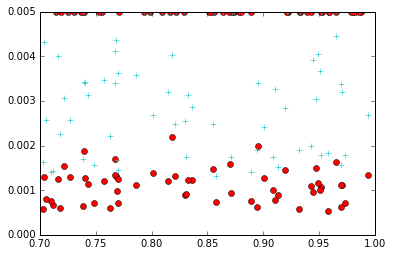

In [55]:
plt.plot([ex[12][0] for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([ex[12][0] for ex in ex_list], [ex[7] for ex in ex_list], 'c+')

plt.figure()
plt.plot([ex[12][1] for ex in ex_list], [ex[8] for ex in ex_list], 'ro')
plt.plot([ex[12][1] for ex in ex_list], [ex[9] for ex in ex_list], 'c+')
plt.ylim(0., 0.005)
plt.figure()

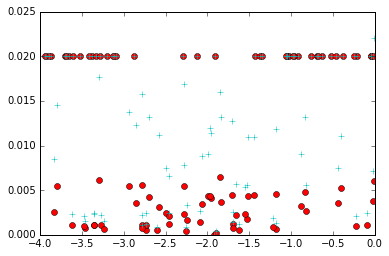

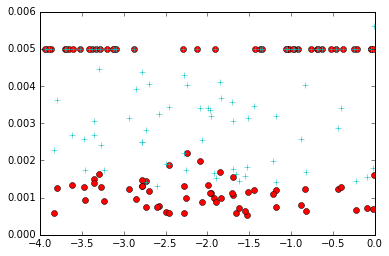

In [56]:
# gamma_scale 敏感すぎ 0.01
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[6] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[7] for ex in ex_list], 'c+')
plt.figure()
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[8] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[9] for ex in ex_list], 'c+')

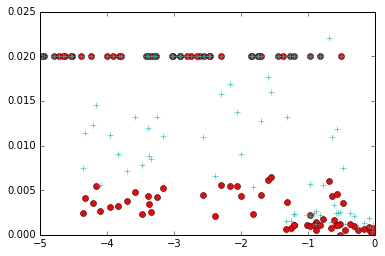

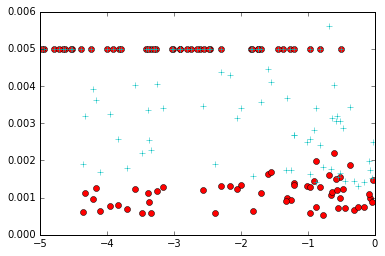

In [57]:
# bias_scale 1くらいがよさげ
plt.plot(np.log10([ex[14] for ex in ex_list]), [ex[6] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[14] for ex in ex_list]), [ex[7] for ex in ex_list], 'c+')
plt.figure()
plt.plot(np.log10([ex[14] for ex in ex_list]), [ex[8] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[14] for ex in ex_list]), [ex[9] for ex in ex_list], 'c+')

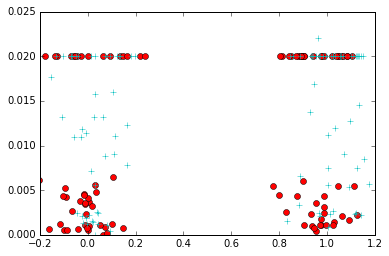

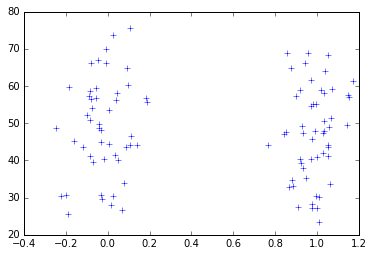

In [66]:
# おなじ
plt.plot([int(ex[15] == ['relu', 'relu'])+0.1*np.random.randn() for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([int(ex[15] == ['relu', 'relu']) +0.1*np.random.randn() for ex in ex_list], [ex[7] for ex in ex_list], 'c+')
plt.xlim(-0.2, 1.2)
plt.figure()
plt.plot([int(ex[15] == ['relu', 'relu']) +0.1*np.random.randn() for ex in ex_list], [ex[3] for ex in ex_list], '+')